In [2]:
import matplotlib.pyplot as mlt
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go

In [57]:
#coviddata
 
df=pd.read_csv("raw_data.csv")
df= df.drop(df.columns[[9,10,11,12,13]],
                       axis = 1)
df

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535


In [56]:
df.count()

iso_code                   50418
location                   50418
date                       50418
total_cases                47324
total_deaths               39228
stringency_index           43292
population                 50418
gdp_per_capita             44706
human_development_index    44216
dtype: int64

In [61]:
drdf = df[df.duplicated()]
print("Duplicate rows:",drdf)

Duplicate rows: Empty DataFrame
Columns: [iso_code, location, date, total_cases, total_deaths, stringency_index, population, gdp_per_capita, human_development_index]
Index: []


In [59]:
df["total_cases"].fillna(0,inplace= True)
df["total_deaths"].fillna(0,inplace= True)
df["stringency_index"].fillna(0,inplace= True)
df["location"].value_counts()
df.to_csv("clean_data.csv",index=False)

In [62]:
data1=pd.read_csv("finaldata.csv")
data2=pd.read_csv('raw_data.csv')

print(data2["location"].value_counts().mode())


0    294
Name: location, dtype: int64


In [63]:
isc=data1['iso_code'].unique().tolist()
country=data1['location'].unique().tolist()
tc=[]
td=[]
st=[]
pop=data1['population'].unique().tolist()
gdp=data1['gdp_per_capita'].unique().tolist()
hdi=[]
#print(data2.loc[data2['location']=='Afghanistan',"total_cases"].sum())
#data=pd.read_csv("finaldata.csv",index_col="iso_code")
for i in country:
    hdi.append((data1.loc[data1["location"] == i, "hdi"]).sum()/294)
    tc.append(data2.loc[data2['location']==i,"total_cases"].sum())
    td.append(data2.loc[data2['location']==i,"total_deaths"].sum())
    st.append(data1.loc[data1['location']==i,"stringency_index"].sum()/294)

In [64]:
ag_data=pd.DataFrame(list(zip(isc,country,tc,td,st,pop,gdp,hdi)),
                     columns=["country_code","country","Total_cases","Total_deaths","stringency"
                              ,"Population","gdppc","hdi"])
ag_data.to_csv("agr_data.csv",index=False)

In [66]:
agdata=pd.read_csv("agr_data.csv")
data = agdata.sort_values(by=["Total_cases"], ascending=False)
data.head()

,country_code,country,Total_cases,Total_deaths,stringency,Population,gdppc,hdi
146,USA,United States,746014098,26477574,50.501973,331002647,54225.446,0.710286
18,BRA,Brazil,425704517,14340567,49.048027,212559409,14103.452,0.487929
62,IND,India,407771615,7247327,59.208912,1380004385,6426.674,0.468027
116,RUS,Russia,132888951,2131571,46.096803,145934460,24765.954,0.555102
110,PER,Peru,74882695,3020038,63.605204,32971846,12236.706,0.545918


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 146 to 77
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    154 non-null    int64  
 1   country_code  154 non-null    object 
 2   country       154 non-null    object 
 3   Total_cases   154 non-null    float64
 4   Total_deaths  154 non-null    float64
 5   stringency    154 non-null    float64
 6   Population    154 non-null    int64  
 7   gdppc         154 non-null    float64
 8   hdi           154 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 12.0+ KB


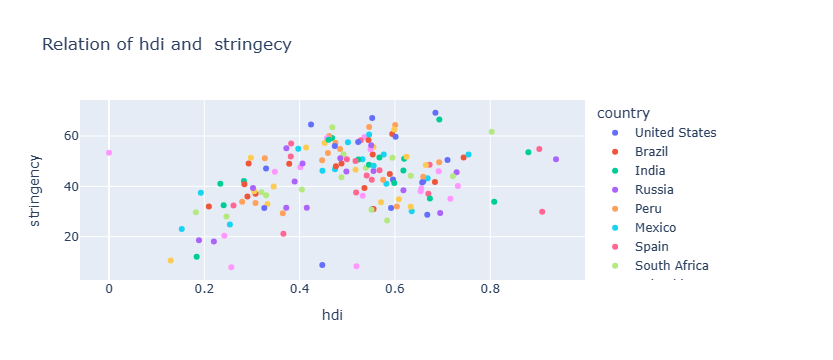

In [45]:
# relation hdi and stringecy 
fig=px.scatter(data, x='hdi',y='stringency',
               color='country',
                title="  Relation of hdi and  stringecy")
fig.show()

In [67]:
mortality=[]
total_case=data['Total_cases'].to_list()
total_death=data['Total_deaths'].to_list()
for i in range(154):
    mrt=(total_death[i]/total_case[i])*100
    mortality.append(round(mrt,2))

data['mortality']=mortality
data

,country_code,country,Total_cases,Total_deaths,stringency,Population,gdppc,hdi,mortality
146,USA,United States,746014098,26477574,50.501973,331002647,54225.446,0.710286,3.55
18,BRA,Brazil,425704517,14340567,49.048027,212559409,14103.452,0.487929,3.37
62,IND,India,407771615,7247327,59.208912,1380004385,6426.674,0.468027,1.78
116,RUS,Russia,132888951,2131571,46.096803,145934460,24765.954,0.555102,1.60
110,PER,Peru,74882695,3020038,63.605204,32971846,12236.706,0.545918,4.03
...,...,...,...,...,...,...,...,...,...
108,PNG,Papua New Guinea,35966,417,10.563469,8947027,3823.194,0.129524,1.16
19,BRN,Brunei,30140,475,31.446258,437483,71809.251,0.591878,1.58
10,BRB,Barbados,24998,1321,39.349150,287371,16978.068,0.536054,5.28
46,FJI,Fiji,4742,132,12.078537,896444,8702.975,0.183990,2.78


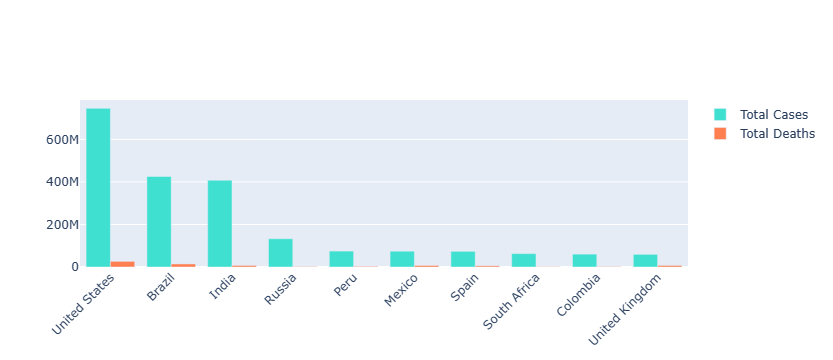

In [76]:
# total deaths in top 10 country with  hightest total cases

fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["country"].head(10),
    y=data["Total_cases"].head(10),
    name='Total Cases',
    marker_color='Turquoise'
))
fig.add_trace(go.Bar(
    x=data["country"].head(10),
    y=data["Total_deaths"].head(10),
    name='Total Deaths',
    marker_color='Coral'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()


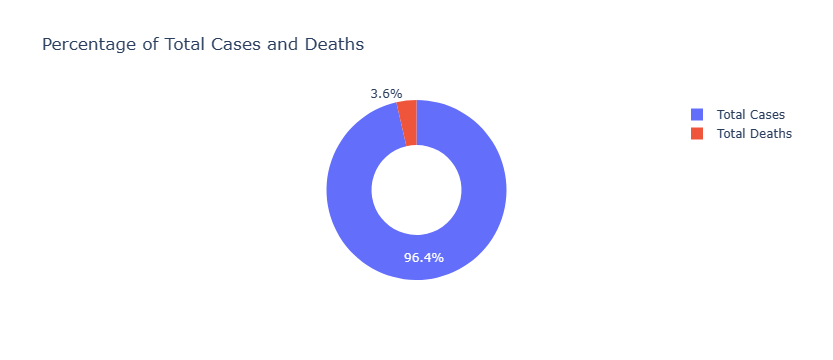

In [77]:
# Percentage of Total Cases and Deaths

cases = data["Total_cases"].sum()
deceased = data["Total_deaths"].sum()
labels = ["Total Cases", "Total Deaths"]
values = [cases, deceased]
fig = px.pie(data, values=values, names=labels, 
             title='Percentage of Total Cases and Deaths', hole=0.5)
fig.show()


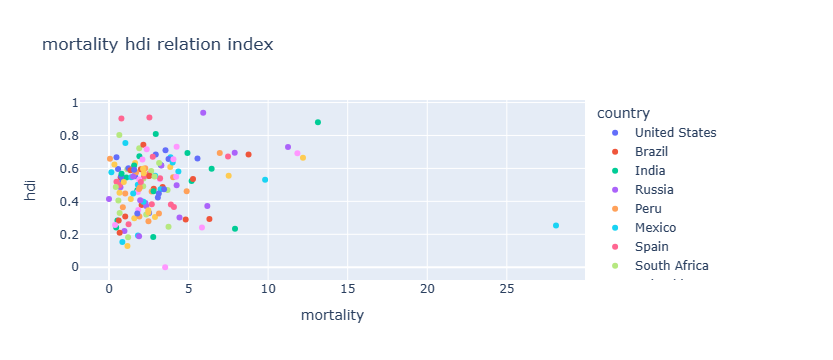

In [37]:
fig=px.scatter(data, y='hdi', x='mortality',
               color='country', hover_data='country',
                title=" mortality hdi relation index")
fig.show()

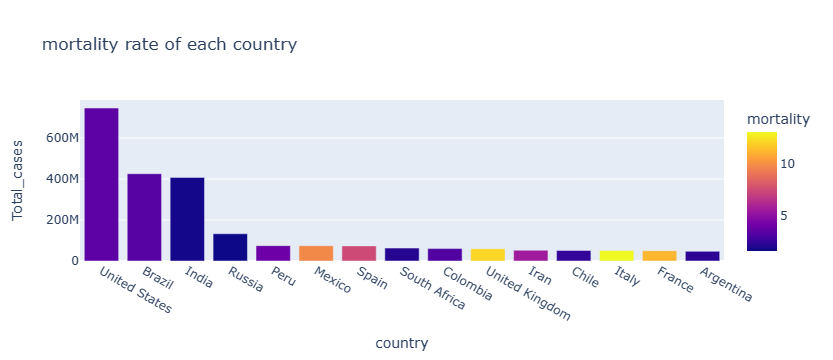

In [101]:
fig=px.bar(data.head(15), x='country',y='Total_cases',
          color='mortality',
          title=' mortality rate of each country')
fig.show()


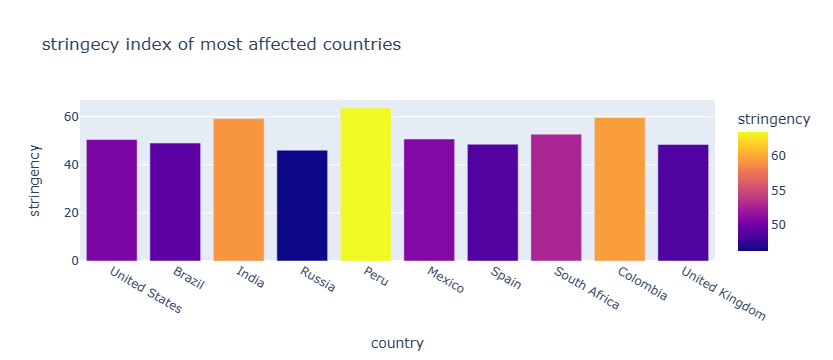

In [13]:
# stringency index of country with highest covid-19 cases
fig=px.bar(data.head(10),x='country',y='stringency',
           hover_data=['Total_deaths','Total_cases'],
           color='stringency',
           title="stringecy index of most affected countries")
fig.show()

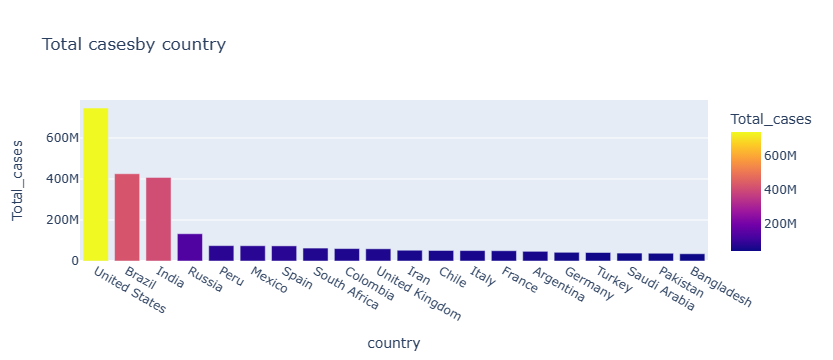

In [109]:

# total cases by each country

fig = px.bar(data.head(20), x='country', y='Total_cases',
             hover_data=['Population', 'Total_deaths'], 
             color='Total_cases',
             title="Total casesby country ")
fig.show()


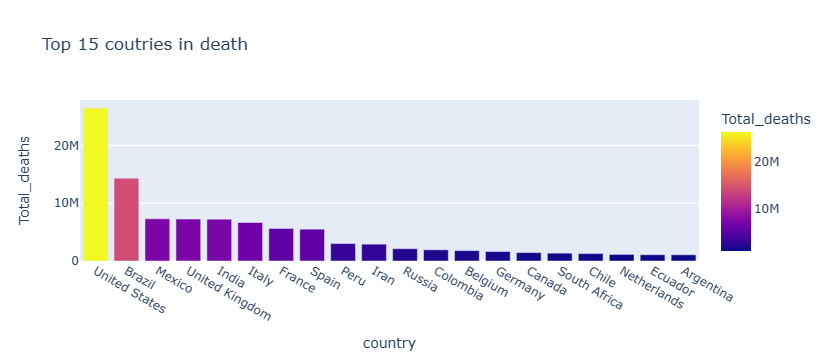

In [108]:
df = agdata.sort_values(by=["Total_deaths"], ascending=False)
fig=px.bar(df.head(20),x='country',y='Total_deaths',
           color='Total_deaths',
          title='Top 15 coutries in death')
fig.show()

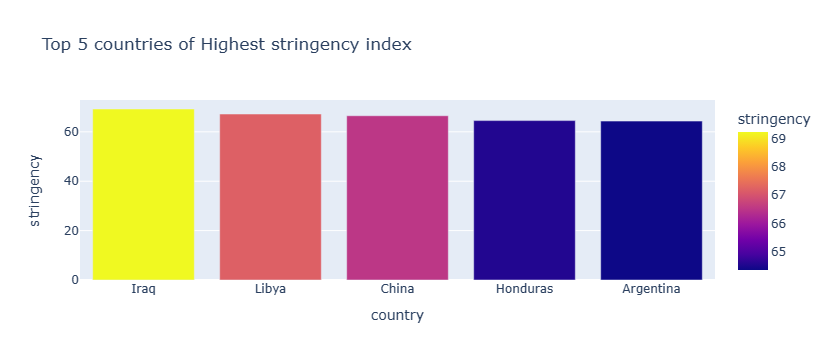

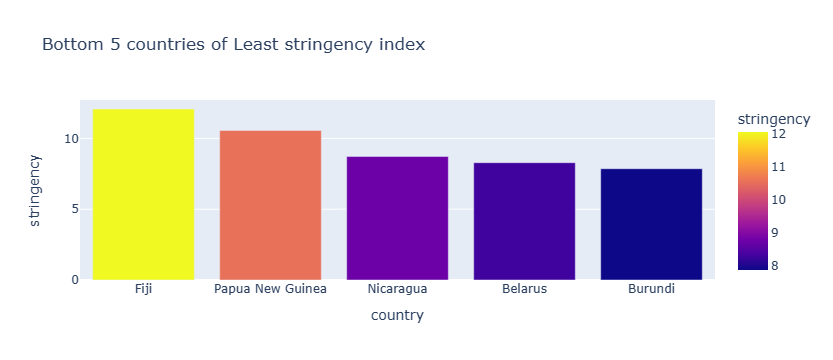

In [79]:
ds = agdata.sort_values(by=["stringency"], ascending=False)
fig=px.bar(ds.head(),x='country', y='stringency',
           color='stringency',
          title='Top 5 countries of Highest stringency index')
fig.show()
fig=px.bar(ds.tail(),x='country', y='stringency',
           color='stringency',
          title='Bottom 5 countries of Least stringency index')
fig.show()

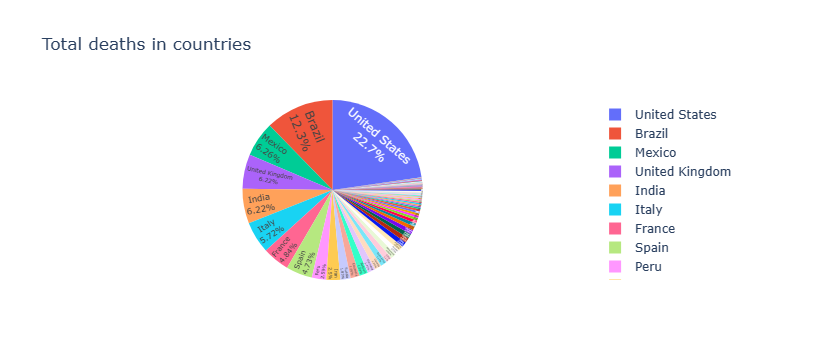

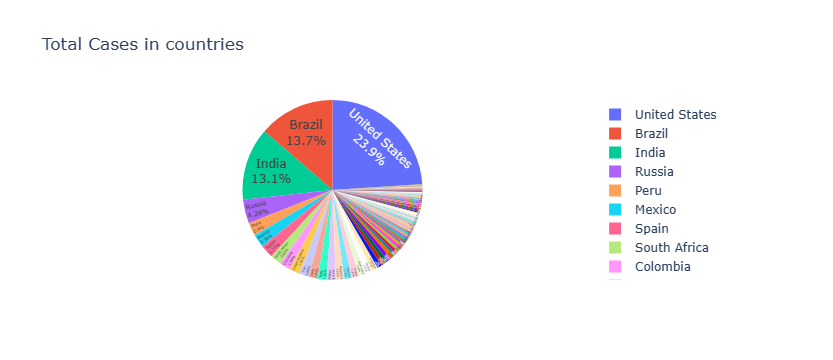

In [47]:
fig = px.pie(data, values='Total_deaths', names='country', title='Total deaths in countries')
fig.update_traces(hoverinfo='percent', textposition='inside', textinfo='percent+label')
fig.show()
fig = px.pie(data, values='Total_cases', names='country', title='Total Cases in countries')
fig.update_traces(hoverinfo='percent', textposition='inside', textinfo='percent+label')
fig.show()